In [7]:
import os
import pandas as pd

dataFolder="../RAVEN/Trial"
datafiles=[dataFolder+"/"+x for x in os.listdir(dataFolder)]
myData=pd.DataFrame()

#getting all info into one file
#mapping wrong question to 0
#mapping right question to 1
for file in datafiles:
    xlsxfile=pd.ExcelFile(file)
    sheets = {sheet_name: xlsxfile.parse(sheet_name) for sheet_name in xlsxfile.sheet_names}
    if file.split("_")[-1].split(".")[0]=="Right":
        answer=1
    else:
        answer=0
    for sheet in sheets:
        if not sheets[sheet].empty:
            subjects=sheets[sheet]["Unnamed: 22"]
            del sheets[sheet]["Unnamed: 22"]
            subjects=subjects.str.startswith("DEI")
            subjects=subjects.astype(int)
            sheets[sheet]["Answer"]=answer
            sheets[sheet]["Area"]=subjects
            myData=pd.concat([myData,sheets[sheet]], ignore_index=True)

#centering and normalizing data
for col in myData:
    if col != "Answer" and col != "Area":
        myData[col]=(myData[col]-myData[col].mean())/myData[col].std()
myData=myData.dropna()

for col in myData:
    if col != "Answer" and col != "Area":
        myData[col]=myData[col][~((myData[col]-myData[col].mean()).abs() > 3*myData[col].std())]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd01c851908>,
      dtype=object)

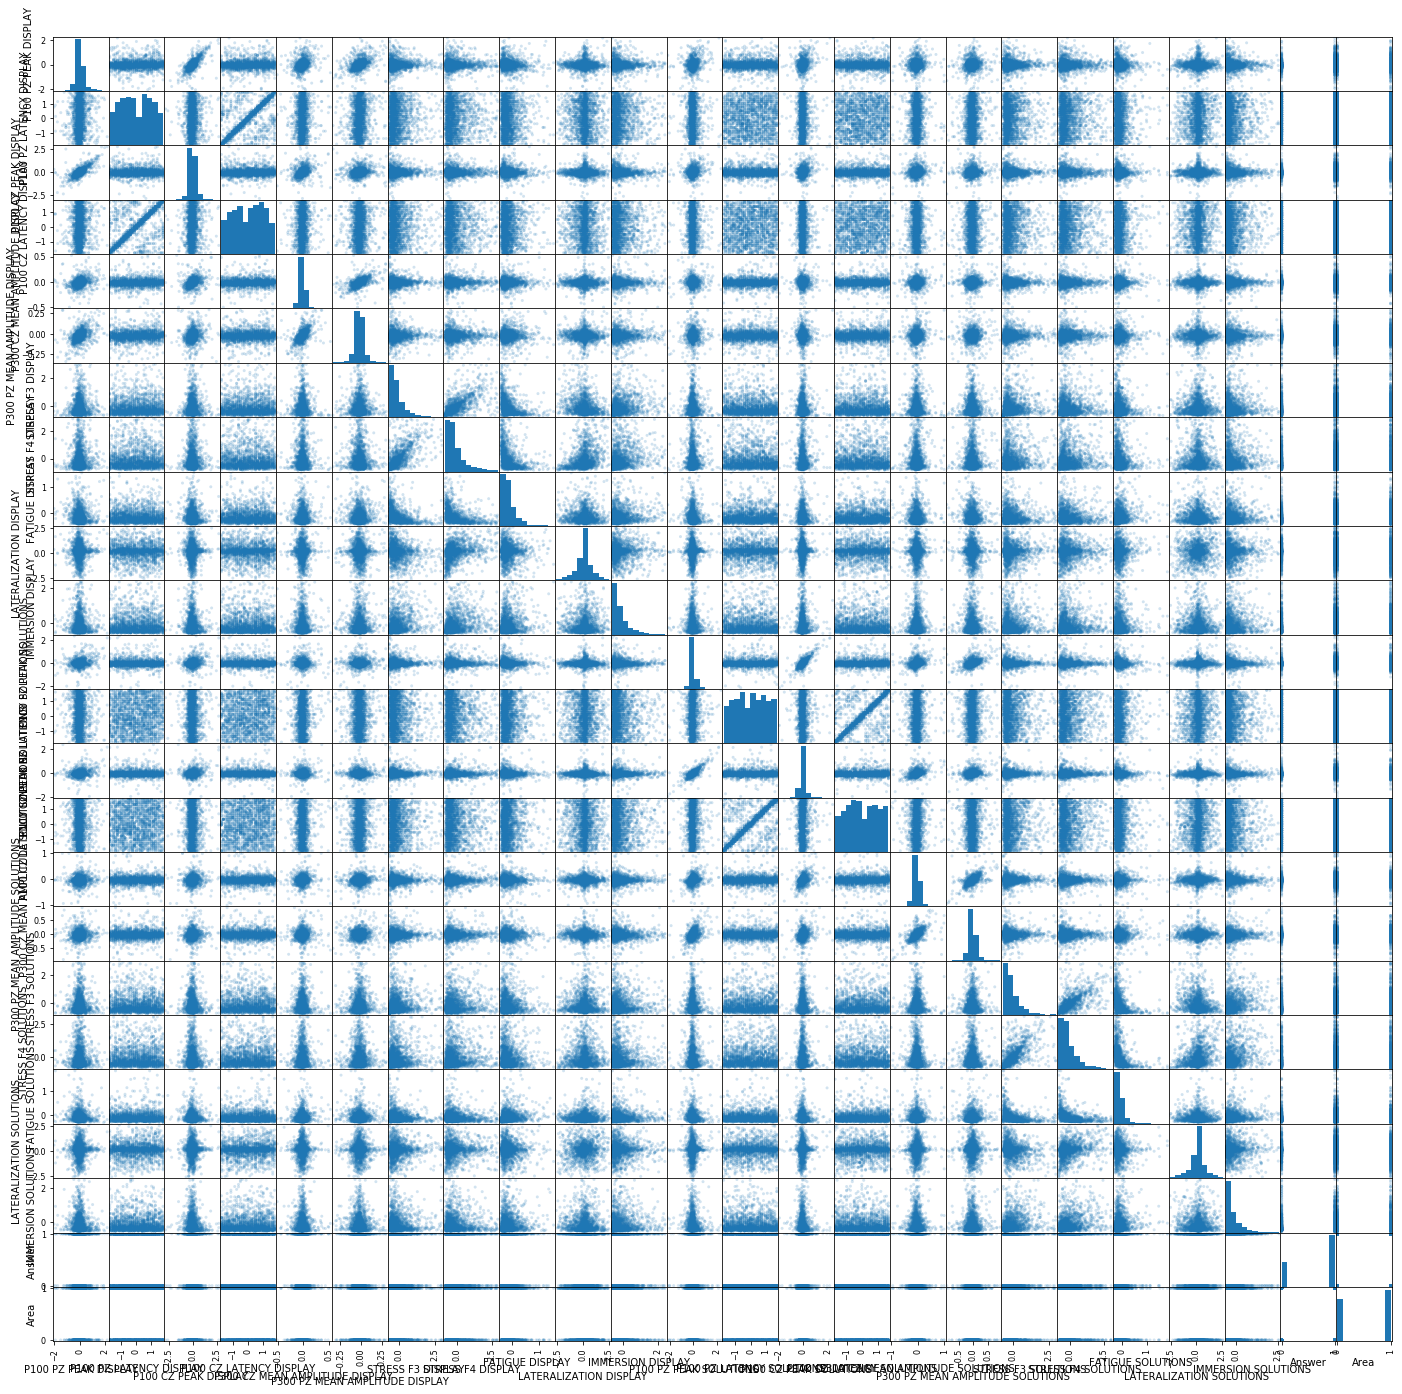

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(myData, alpha=0.2, figsize=(len(myData.columns), len(myData.columns)))

In [2]:
#Dataset Division

from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split(myData, test_size = 0.2, random_state = 1)

X_train = training_set.iloc[:,0:-2].values
Y_train = training_set.iloc[:,-1].values
X_test = test_set.iloc[:,0:-2].values
Y_test = test_set.iloc[:,-1].values

In [4]:
#SVM

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.svm import SVC

clrSVM = SVC(kernel='sigmoid', random_state = 1, gamma="auto")
clrSVM.fit(X_train,Y_train)

predSVM = clrSVM.predict(X_test)

#cmSVM = confusion_matrix(Y_test,predictions)
print("Accuracy for Support Vector Machine Classifier: " + str(accuracy_score(Y_test, predSVM)*100)+"%")
print("F1-Score for Support Vector Machine Classifier: " + str(f1_score(Y_test, predSVM)*100)+"%")

Accuracy for Support Vector Machine Classifier: 53.05039787798409%
F1-Score for Support Vector Machine Classifier: 57.756563245823386%


In [15]:
#NN

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
scaler.fit(X_train)

X_trainNN = scaler.transform(X_train)
X_testNN = scaler.transform(X_test)

clrMLP = MLPClassifier(hidden_layer_sizes=(10,5),max_iter=900,activation="identity",solver="lbfgs")
clrMLP.fit(X_trainNN,Y_train)

predNN = clrMLP.predict(X_test)

#cmNN = confusion_matrix(Y_test,predictions)
print("Accuracy for Neural Network Classifier: " + str(accuracy_score(Y_test, predNN)*100)+"%")
print("F1-Score for Neural Network Classifier: " + str(f1_score(Y_test, predNN)*100)+"%")

Accuracy for Neural Network Classifier: 57.02917771883289%
F1-Score for Neural Network Classifier: 67.46987951807229%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clrDT = DecisionTreeClassifier(criterion="gini")
clrDT = clrDT.fit(X_train, Y_train)

predDT = clrDT.predict(X_test)

#cmDT = confusion_matrix(Y_test,predictions)
print("Accuracy for Decision Tree Classifier: " + str(accuracy_score(Y_test, predDT)*100)+"%")
print("F1-Score for Decision Tree Classifier: " + str(f1_score(Y_test, predDT)*100)+"%")

In [11]:
from sklearn.ensemble import RandomForestClassifier

clrRF = RandomForestClassifier(n_estimators=15)
clrRF = clrRF.fit(X_train, Y_train)

predRF = clrRF.predict(X_test)

#cmRF = confusion_matrix(Y_test,predictions)
print("Accuracy for Random Forrest Classifier: " + str(accuracy_score(Y_test, predRF)*100)+"%")
print("F1-Score for Random FOrrest Classifier: " + str(f1_score(Y_test, predRF)*100)+"%")

Accuracy for Random Forrest Classifier: 55.437665782493376%
F1-Score for Random FOrrest Classifier: 59.61538461538461%


In [17]:
from sklearn.neighbors import KNeighborsClassifier

clrKN = KNeighborsClassifier(n_neighbors=3)
clrKN = clrKN.fit(X_train, Y_train)

predKN = clrKN.predict(X_test)

#cmKN = confusion_matrix(Y_test,predictions)
print("Accuracy for KNeighbors Classifier: " + str(accuracy_score(Y_test, predKN)*100)+"%") 
print("F1-Score for KNeighbors Classifier: " + str(f1_score(Y_test, predKN)*100)+"%") 

Accuracy for KNeighbors Classifier: 49.3368700265252%
F1-Score for KNeighbors Classifier: 56.09195402298851%
